<a id='top'></a>

# ELO Team Ratings Data Parsing
##### Notebook to parse team rating data from landed from [Club ELO](http://clubelo.com/) through their API.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 02/09/2021<br>
Notebook last updated: 04/09/2021

![title](../../img/logos/elo.png)

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook engineers transfer data data from [Club ELO](http://clubelo.com/), and manipulates this landed data as DataFrames using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for visualisation.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>
This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [170]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date, timedelta
import time

# Data Preprocessing
import pandas as pd
#import pandas_profiling as pp
import os
import re
import random
from io import BytesIO, StringIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Flatten lists
from functools import reduce

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from bs4 import BeautifulSoup
import re

# Currency Convert
from forex_python.converter import CurrencyRates

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.20.3
pandas: 1.3.2
matplotlib: 3.4.2


### Defined Filepaths

In [3]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_elo = os.path.join(base_dir, 'data', 'elo')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Defined Variables

In [4]:
# Defined Variables

## Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Dictionaries

In [139]:
# Defined Dictionaries

## Define seasons
dict_seasons = {1975: '1975/1976',
                1976: '1976/1977',
                1977: '1977/1978',
                1978: '1978/1979',
                1979: '1979/1980',
                1980: '1980/1981',
                1981: '1981/1982',
                1982: '1982/1983',
                1983: '1983/1984',
                1984: '1984/1985',
                1985: '1985/1986',
                1986: '1986/1987',
                1987: '1987/1988',
                1988: '1988/1989',
                1989: '1989/1990',
                1990: '1990/1991',
                1991: '1991/1992',
                1992: '1992/1993',
                1993: '1993/1994',
                1994: '1994/1995',
                1995: '1995/1996',
                1996: '1996/1997',
                1997: '1997/1998',
                1998: '1998/1999',
                1999: '1999/2000',
                2000: '2000/2001',
                2001: '2001/2002',
                2002: '2002/2003',
                2003: '2003/2004',
                2004: '2004/2005',
                2005: '2005/2006',
                2006: '2006/2007',
                2007: '2007/2008',
                2008: '2008/2009',
                2009: '2009/2010',
                2010: '2010/2011',
                2011: '2011/2012',
                2012: '2012/2013',
                2013: '2013/2014',
                2014: '2014/2015',
                2015: '2015/2016',
                2016: '2016/2017',
                2017: '2017/2018',
                2018: '2018/2019',
                2019: '2019/2020',
                2020: '2020/2021',
                2021: '2021/2022',
                2022: '2022/2023',
                2023: '2023/2024',
               }

### Defined Lists

In [104]:
# Defined Lists

## Define list of folders
lst_folders = ['raw', 'engineered']


## Define list of data types
lst_data_types = ['ratings_by_date', 'ratings_by_team']


## Define lists of Teams and Countries
df_elo_teams_leagues = pd.read_csv(data_dir + '/reference/teams/elo_team_leagues_latest.csv')

### Countries
lst_countries = list(df_elo_teams_leagues['Country'].unique())

### 'Big 5' European League Countries
lst_countries_big5 = ['ENG', 'ESP', 'FRA', 'GER', 'ITA']

### Teams 
lst_teams = list(df_elo_teams_leagues['Club'].unique())

### Custom Functions

In [24]:
# Define retry requests session function - taken from: https://www.peterbe.com/plog/best-practice-with-retries-with-requests
def requests_retry_session(
    retries=3,
    backoff_factor=0.3,
    status_forcelist=(500, 502, 504),
    session=None,
):
    session = session or requests.Session()
    retry = Retry(
        total=retries,
        read=retries,
        connect=retries,
        backoff_factor=backoff_factor,
        status_forcelist=status_forcelist,
    )
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    return session

In [57]:
# Define function for scraping the Elo rating, team-by-team
def get_elo_team_ratings():
    
    """
    Function to scrape the Elo ratings of teams, team-by-team.
    """       
    
    ## Start timer
    tic = datetime.datetime.now()
    
    
    ## Print time scraping started
    print(f'Scraping started at: {tic}')
    
    ## Define list of countries
    lst_countries =list(df_elo_teams_leagues['Country'].unique())
    
    ## Loop through countries
    for country in lst_countries:
        
        ### Print statement
        print(f'Scraping started for Team Elo data for {country}...')
        
        df_temp = df_elo_teams_leagues[df_elo_teams_leagues['Country']==country]
        lst_teams = list(df_temp['Club'].unique())
    
        ### Loop through teams
        for team in lst_teams:
            
            #### Define team name used when saving to folder (Snailcase)
            team_folder = team.replace(' ', '_')
            
            #### Define team name for use with URL (lowercase, no spaces)
            team_stripped = team.lower().strip().replace(' ', '')
            
            #### Save Player URL List (if not already saved)
            if not os.path.exists(os.path.join(data_dir_elo + f'/raw/ratings_by_team/{country}/{team_folder}_{country}_elo_rating_latest.csv')):

                ##### Scraping

                ###### Print statement
                print(f'Scraping started for Team Elo data {team} in {country}...')

                ###### Define URL
                url = f'http://api.clubelo.com/{team_stripped}'

                ###### Call requests_retry_session function, defined in previous command
                response = requests_retry_session().get(url)
                #print(response.status_code)

                ###### 
                s = requests.Session()
                s.auth = ('user', 'pass')
                s.headers.update({'x-test': 'true'})

                ##### 
                response = requests_retry_session(session=s).get(url)

                ###### 
                data = StringIO(response .text)
                df = pd.read_csv(data, sep=',')

                
                ###### Data Engineering
                
                ####### Convert 'From' and 'To' to datatime 
                df['From'] = pd.to_datetime(df['From'])
                df['To'] = pd.to_datetime(df['To'])

                ####### Drop duplicate rows
                df = df.drop_duplicates()

                
                ##### Save DataFrame
                
                ###### Save latest version
                df.to_csv(data_dir_elo + f'/raw/ratings_by_team/{country}/{team_folder}_{country}_elo_rating_latest.csv', index=None, header=True)        

                ###### Export a copy to the 'archive' subfolder, including the date
                df.to_csv(data_dir_elo + f'/raw/ratings_by_team/{country}/archive/{team_folder}_{country}_elo_rating_last_updated_{today}.csv', index=None, header=True)        

                
                ##### Print statement for team
                print(f'Team Elo rating data for {team} scraped and saved.')


            ##### If Team Elo rating already saved
            else:

                ###### Print statement
                print(f'Team Elo rating data for {team} already saved as a CSV file.')         

                
    ## End timer
    toc = datetime.datetime.now()
    
    
    ## Print time scraping ended
    print(f'Scraping ended at: {toc}')

    
    ## Calculate time take
    total_time = (toc-tic).total_seconds()
    print(f'Time taken to scrape the Team Elo for {len(teams)} teams in {len(countries)} countries is: {total_time/60:0.2f} minutes.')

    
    ## Unify individual CSV files as a single DataFrame
    
    ### Show files in directory
    all_files = glob.glob(os.path.join(data_dir_elo + f'/raw/ratings_by_team/*/*_elo_rating_latest.csv'))
    
    ### Create an empty list of Players URLs
    lst_team_elo_ratings_all = []

    ### Loop through list of files and read into temporary DataFrames
    for filename in all_files:
        df_temp = pd.read_csv(filename, index_col=None, header=0)
        lst_team_elo_ratings_all.append(df_temp)

    ### Concatenate the files into a single DataFrame
    df_elo_teams_all = pd.concat(lst_team_elo_ratings_all, axis=0, ignore_index=True)
        
    ### Reset index
    df_elo_teams_all = df_elo_teams_all.reset_index(drop=True)
    
    ### Sort DataFrame
    df_elo_teams_all = df_elo_teams_all.sort_values(['Country', 'Club', 'To'], ascending=[True, True, True])

    
    ## Export DataFrame
    
    ### Save latest version
    df_elo_teams_all.to_csv(data_dir_elo + f'/raw/ratings_by_team/elo_team_ratings_combined_latest.csv', index=None, header=True)
    
    ### Save a copy to archive folder (dated)
    df_elo_teams_all.to_csv(data_dir_elo + f'/raw/ratings_by_team/archive/elo_team_ratings_combined_last_updated_{today}.csv', index=None, header=True)
    
    
    ## Distinct number of clubs and countries
    total_countries = df_elo_teams_all['Country'].nunique()
    total_clubs = df_elo_teams_all['Club'].nunique()


    ## Print statement
    print(f'Combined Elo DataFrame contains {total_countries} countries and {total_clubs} clubs.')
    
    
    ## Return final list of Player URLs
    return(df_elo_teams_all)

### Create Directory Structure
Create folders and subfolders for data, if not already created.

In [7]:
# Make the data directory structure
for folder in lst_folders:
    path = os.path.join(data_dir_elo, folder)
    if not os.path.exists(path):
        os.mkdir(path)
        for data_types in lst_data_types:
            path = os.path.join(data_dir_elo, folder, data_types)
            if not os.path.exists(path):
                os.mkdir(path)
                for country in lst_countries:
                    path = os.path.join(data_dir_elo, folder, data_types, country)
                    if not os.path.exists(path):
                        os.mkdir(path)
                        os.mkdir(os.path.join(path, 'archive'))

### Notebook Settings

In [8]:
# Display all columns of pandas DataFrames
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook is part of a series of notebooks to scrape, parse, engineer, unify, and the model, culminating in a an Expected Transfer (xTransfer) player performance vs. valuation model. This model aims to determine the under- and over-performing players based on their on-the-pitch output against transfer fee and wages.

This particular notebook is one of several data parsing notebooks, that cleans team rating data from [Club ELO](http://clubelo.com/) using [pandas](http://pandas.pydata.org/).

This notebook, along with the other notebooks in this project workflow are shown in the following diagram:

![roadmap](../../img/football_analytics_data_roadmap.png)

Links to these notebooks in the [`football_analytics`](https://github.com/eddwebster/football_analytics) GitHub repository can be found at the following:
*    [Webscraping](https://github.com/eddwebster/football_analytics/tree/master/notebooks/1_data_scraping)
     +    [FBref Player Stats Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/FBref%20Player%20Stats%20Web%20Scraping.ipynb)
     +    [TransferMarket Player Bio and Status Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/TransferMarkt%20Player%20Bio%20and%20Status%20Web%20Scraping.ipynb)
     +    [TransferMarket Player Valuation Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/TransferMarkt%20Player%20Valuation%20Web%20Scraping.ipynb)
     +    [TransferMarkt Player Recorded Transfer Fees Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/TransferMarkt%20Player%20Recorded%20Transfer%20Fees%20Webscraping.ipynb)
     +    [Capology Player Salary Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/Capology%20Player%20Salary%20Web%20Scraping.ipynb)
     +    [FBref Team Stats Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/FBref%20Team%20Stats%20Web%20Scraping.ipynb)
*    [Data Parsing](https://github.com/eddwebster/football_analytics/tree/master/notebooks/2_data_parsing)
     +    [ELO Team Ratings Data Parsing](https://github.com/eddwebster/football_analytics/blob/master/notebooks/2_data_parsing/ELO%20Team%20Ratings%20Data%20Parsing.ipynb)
*    [Data Engineering](https://github.com/eddwebster/football_analytics/tree/master/notebooks/3_data_engineering)
     +    [FBref Player Stats Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/FBref%20Player%20Stats%20Data%20Engineering.ipynb)
     +    [TransferMarket Player Bio and Status Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Bio%20and%20Status%20Data%20Engineering.ipynb)
     +    [TransferMarket Player Valuation Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Valuation%20Data%20Engineering.ipynb)
     +    [TransferMarkt Player Recorded Transfer Fees Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Recorded%20Transfer%20Fees%20Data%20Engineering.ipynb)
     +    [Capology Player Salary Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/Capology%20Player%20Salary%20Data%20Engineering.ipynb)
     +    [FBref Team Stats Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/FBref%20Team%20Stats%20Data%20Engineering.ipynb)
     +    [ELO Team Ratings Data Parsing](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/ELO%20Team%20Ratings%20Data%20Parsing.ipynb)
     +    [TransferMarkt Team Recorded Transfer Fee Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Team%20Recorded%20Transfer%20Fee%20Data%20Engineering.ipynb) (aggregated from [TransferMarkt Player Recorded Transfer Fees notebook](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Recorded%20Transfer%20Fees%20Data%20Engineering.ipynb))
     +    [Capology Team Salary Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/Capology%20Team%20Salary%20Data%20Engineering.ipynb) (aggregated from [Capology Player Salary notebook](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/Capology%20Player%20Salary%20Data%20Engineering.ipynb))
*    [Data Unification](https://github.com/eddwebster/football_analytics/tree/master/notebooks/4_data_unification)
     +    [Golden ID for Player Level Datasets](https://github.com/eddwebster/football_analytics/blob/master/notebooks/4_data_unification/Golden%20ID%20for%20Player%20Level%20Datasets.ipynb)
     +    [Golden ID for Team Level Datasets](https://github.com/eddwebster/football_analytics/blob/master/notebooks/4_data_unification/Golden%20ID%20for%20Team%20Level%20Datasets.ipynb)
*    [Production Datasets](https://github.com/eddwebster/football_analytics/tree/master/notebooks/5_production_datasets)
     +    [Player Performance/Market Value Dataset](https://github.com/eddwebster/football_analytics/tree/master/notebooks/5_production_datasets/Player%20Performance/Market%20Value%20Dataset.ipynb)
     +    [Team Performance/Market Value Dataset](https://github.com/eddwebster/football_analytics/tree/master/notebooks/5_production_datasets/Team%20Performance/Market%20Value%20Dataset.ipynb)
*    [Expected Transfer (xTransfer) Modeling](https://github.com/eddwebster/football_analytics/tree/master/notebooks/6_data_analysis_and_projects/expected_transfer_modeling)
     +    [Expected Transfer (xTransfer) Modeling](https://github.com/eddwebster/football_analytics/tree/master/notebooks/6_data_analysis_and_projects/expected_transfer_modeling/Expected%20Transfer%20%20Modeling.ipynb)

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Data Dictionaries</a>
The [Club ELO](http://clubelo.com/) dataset has eight features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Rank`    | object     |
| `Club`    | object     |
| `Country`    | object     |
| `Level`    | object     |
| `Elo`    | object     |
| `From`    | object     |
| `To`    | object     |

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Scrape the Data</a>
See the [Club ELO](http://clubelo.com/) API [[link](http://clubelo.com/API)].

Potential methodology to approach this problem
- Day-by-day rankings seems to be not loading well, but teams are. Day-by-day rankings also only includes team rankings that are in the top 1/2 leagues, per competition. An example is Sheffield Wednesday that does not make the cut in 2021.
- Download the day-by-day rankings once or twice per season, for the last x season. Use this to get all the unique team names.
- From the unique team names gathered in the previous step, created a DataFrame of unique team names. From this DataFrame, create a list to loop through and download all their individual rankings. Expecting the final DataFrame to have at least 3.5M rows, if not more for lower-league English teams
- In the same method as the TM Transfer History script, find a way to aggregate the rankings to an annual value, per team, per season.

<a id='section3.2.1'></a>

#### <a id='#section3.2.1'>3.2.1. Read in Data of Elo Rankings by Date</a>
- Data downloaded from: api.clubelo.com/YYYY-MM-DD .
- Data downloads very slow and was done manually.
- Following dataset will be used to determine a DataFrame of unique teams and their leagues. The data itself is not required.

In [9]:
## Unify individual CSV files as a single DataFrame

### Show files in directory
all_files = glob.glob(os.path.join(data_dir_elo + '/raw/ratings_by_date/*/*.csv'))

### Create an empty list of Players URLs
lst_team_elo_rating_all = []

### Loop through list of files and read into temporary DataFrames
for filename in all_files:
    df_temp = pd.read_csv(filename, index_col=None, header=0)
    lst_team_elo_rating_all.append(df_temp)

### Concatenate the files into a single DataFrame
df_elo_team_ratings_all = pd.concat(lst_team_elo_rating_all, axis=0, ignore_index=True)


## Reset index
df_elo_team_ratings_all = df_elo_team_ratings_all.reset_index(drop=True)


## Sort DataFrame
df_elo_team_ratings_all = df_elo_team_ratings_all.sort_values(['Country', 'Club'], ascending=[True, True])


## Export DataFrame

### Save latest version
df_elo_team_ratings_all.to_csv(data_dir_elo + '/raw/ratings_by_date/elo_team_rating_by_date_combined_latest.csv', index=None, header=True)

### Save a copy to archive folder (dated)
df_elo_team_ratings_all.to_csv(data_dir_elo + f'/raw/ratings_by_date/archive/elo_team_rating_by_date_combined_last_updated_{today}.csv', index=None, header=True)


## Distinct number of players
total_teams = df_elo_team_ratings_all['Club'].nunique()


## Print statement
print(f'The Team ELO Rating by Date DataFrame contains {total_teams:,} teams.')

The Team ELO Rating by Date DataFrame contains 1,497 teams.


In [10]:
df_elo_team_ratings_all

,Rank,Club,Country,Level,Elo,From,To
5696,None,Besa Kavaje,ALB,0,1142.927246,2007-08-31,2008-07-01
5697,None,Besa Kavaje,ALB,0,1137.801514,2007-07-26,2007-08-02
5698,None,Besa Kavaje,ALB,0,1099.695801,2010-07-23,2011-06-30
5699,None,Besa Kavaje,ALB,0,1099.695801,2010-07-23,2011-06-30
5700,None,Besa Kavaje,ALB,0,1142.927246,2007-08-31,2008-07-01
...,...,...,...,...,...,...,...
133286,None,The New Saints,WAL,0,1088.250854,2001-07-26,2001-08-01
133885,None,The New Saints,WAL,0,1064.529297,2002-08-30,2003-07-16
134476,None,The New Saints,WAL,0,1068.116089,2002-07-25,2002-08-15
135076,None,The New Saints,WAL,0,1055.741821,2003-08-29,2004-07-14


In [103]:
# Create DataFrame of unique clubs and countries for reference

## Define columns of interest
lst_cols = ['Club', 'Country']

## Select columns of interest
df_elo_teams_leagues = df_elo_team_ratings_all[lst_cols]


# Drop duplicates
df_elo_teams_leagues = df_elo_teams_leagues.drop_duplicates()


# Sort DataFrame by Country/Club
df_elo_teams_leagues = df_elo_teams_leagues.sort_values(['Country', 'Club'], ascending=[True, True])


# Reset index
df_elo_teams_leagues = df_elo_teams_leagues.reset_index(drop=True)


# Export DataFrame
if not os.path.exists(os.path.join(data_dir + f'/reference/teams/archive/elo_team_leagues_last_updated_{today}.csv')):
    
    ### Save latest version
    df_elo_teams_leagues.to_csv(data_dir + '/reference/teams/elo_team_leagues_latest.csv', index=None, header=True)

    ### Save a copy to archive folder (dated)
    df_elo_teams_leagues.to_csv(data_dir + f'/reference/teams/archive/elo_team_leagues_last_updated_{today}.csv', index=None, header=True)    

else:
    df_elo_teams_leagues = pd.read_csv(data_dir + '/reference/teams/elo_team_leagues_latest.csv')
    print('Data already saved previously')

    
# Display DataFrame
df_elo_teams_leagues.head()

,Club,Country
0,Besa Kavaje,ALB
1,Bylis Ballsh,ALB
2,Dinamo Tirana,ALB
3,Elbasani,ALB
4,Flamurtari,ALB


In [ ]:
df_elo_teams_leagues.shape

In [ ]:
## All unique Teams
lst_teams = list(df_elo_teams_leagues['Club_Trimmed'].unique())

In [15]:
len(lst_teams)

1497

In [16]:
## All unique Countries
lst_countries = list(df_elo_teams_leagues['Country'].unique())

In [17]:
len(lst_countries)

56

<a id='section3.2.2'></a>

#### <a id='#section3.2.2'>3.2.2. Scrape Data of Elo Rankings by Date</a>
Format of scraping data: 'api.clubelo.com/YYYY-MM-DD' e.g. https://api.clubelo.com/2021-09-02.

In [21]:
# Create list of dates for the last number of defined years

## Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

## Create an empty list for scraped player bio data to be appended
lst_dates = []

## Define start and end date
sdate = date(2016, 8, 1)   # start date
edate = date(2021, 9, 2)   # end date    ## CHANGE TO TODAY'S DATE

## Determine the difference between the two dates
delta = edate - sdate       # as timedelta

##
for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    day = day.strftime('%Y/%m/%d').replace('/', '')
    lst_dates.append(day)

In [22]:
len(lst_dates)

1859

<a id='section3.2.3'></a>

#### <a id='#section3.2.3'>3.2.3. Scrape Data of Elo Rankings by Team</a>
Data scraped for individual teams and then saved before being combined to a unified DataFrame, ready for Data Engineering, using the `get_elo_team_ratings()` defined in the **Custom Functions** section of the notebook. This function incorporates ClubElo's API [[link](http://clubelo.com/API)] which has a 'One club's rating history' feature, that provides the ranking history for an individual club, going back to the mid forties (note however that Club Elo states that values before 1960 should be considered provisional).

The format for obtaining a team's ranking is: api.clubelo.com/CLUBNAME i.e. [api.clubelo.com/mancity](api.clubelo.com/mancity).

In [168]:
df_elo_team_ratings_all_raw = get_elo_team_ratings()

Scraping started at: 2021-09-04 18:21:20.001197
Scraping started for Team Elo data for ALB...
Team Elo rating data for Besa Kavaje already saved as a CSV file.
Team Elo rating data for Bylis Ballsh already saved as a CSV file.
Team Elo rating data for Dinamo Tirana already saved as a CSV file.
Team Elo rating data for Elbasani already saved as a CSV file.
Team Elo rating data for Flamurtari already saved as a CSV file.
Team Elo rating data for Kukesi already saved as a CSV file.
Team Elo rating data for Laci already saved as a CSV file.
Team Elo rating data for Luftetari already saved as a CSV file.
Team Elo rating data for Partizani Tirana already saved as a CSV file.
Team Elo rating data for Skenderbeu already saved as a CSV file.
Team Elo rating data for Teuta Durres already saved as a CSV file.
Team Elo rating data for Tirana already saved as a CSV file.
Team Elo rating data for Tomori Berat already saved as a CSV file.
Team Elo rating data for Vllaznia already saved as a CSV file.

FileNotFoundError: [Errno 2] No such file or directory: '../../data/elo/raw/ratings_by_team/CSR/Artmedia_CSR_elo_rating_latest.csv'

<a id='section3.3'></a>

### <a id='#section3.3'>3.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

<a id='section3.3.1'></a>

#### <a id='#section3.3.1'>3.3.1. Summary Report</a>
Initial step of the data handling and Exploratory Data Analysis (EDA) is to create a quick summary report of the dataset using [pandas Profiling Report](https://github.com/pandas-profiling/pandas-profiling).

In [ ]:
# Summary of the data using pandas Profiling Report
#pp.ProfileReport(df_elo_team_ratings_all_raw)

<a id='section3.3.2'></a>

#### <a id='#section3.3.2'>3.3.2. Further Inspection</a>
The following commands go into more bespoke summary of the dataset. Some of the commands include content covered in the [pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) summary above, but using the standard [pandas](https://pandas.pydata.org/) functions and methods that most peoplem will be more familiar with.

First check the quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [62]:
# Display the first five rows of the raw DataFrame, df_elo_team_ratings_all_raw
df_elo_team_ratings_all_raw.head()

,Rank,Club,Country,Level,Elo,From,To
1203829,None,Besa Kavaje,ALB,0,1325.261230,1972-07-01,1972-09-13
1203830,None,Besa Kavaje,ALB,0,1337.468506,1972-09-14,1972-09-27
1203831,None,Besa Kavaje,ALB,0,1338.146362,1972-09-28,1972-10-25
1203832,None,Besa Kavaje,ALB,0,1335.007324,1972-10-26,1972-11-08
1203833,None,Besa Kavaje,ALB,0,1334.845581,1972-11-09,1978-07-01


In [63]:
# Display the last five rows of the raw DataFrame, df_elo_team_ratings_all_raw
df_elo_team_ratings_all_raw.tail()

,Rank,Club,Country,Level,Elo,From,To
1804701,None,Zlatibor,YUG,1,1306.602783,1992-04-30,1992-05-03
1804702,None,Zlatibor,YUG,1,1312.926880,1992-05-04,1992-05-17
1804703,None,Zlatibor,YUG,1,1312.077393,1992-05-18,1992-05-24
1804704,None,Zlatibor,YUG,1,1331.334717,1992-05-25,1992-06-29
1804705,None,Zlatibor,YUG,1,1331.334717,1992-06-30,1995-07-01


In [64]:
# Print the shape of the raw DataFrame, df_elo_team_ratings_all_raw
print(df_elo_team_ratings_all_raw.shape)

(1854899, 7)


In [65]:
# Print the column names of the raw DataFrame, df_elo_team_ratings_all_raw
print(df_elo_team_ratings_all_raw.columns)

Index(['Rank', 'Club', 'Country', 'Level', 'Elo', 'From', 'To'], dtype='object')


The dataset has twelve features (columns).

In [66]:
# Data types of the features of the raw DataFrame, df_elo_team_ratings_all_raw
df_elo_team_ratings_all_raw.dtypes

Rank        object
Club        object
Country     object
Level        int64
Elo        float64
From        object
To          object
dtype: object

In [67]:
# Info for the raw DataFrame, df_elo_team_ratings_all_raw
df_elo_team_ratings_all_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854899 entries, 1203829 to 1804705
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Rank     object 
 1   Club     object 
 2   Country  object 
 3   Level    int64  
 4   Elo      float64
 5   From     object 
 6   To       object 
dtypes: float64(1), int64(1), object(5)
memory usage: 113.2+ MB


In [68]:
# Description of the raw DataFrame, df_elo_team_ratings_all_raw, showing some summary statistics for each numberical column in the DataFrame
df_elo_team_ratings_all_raw.describe()

,Level,Elo
count,1.854899e+06,1.854899e+06
mean,1.189897e+00,1.519541e+03
std,4.280279e-01,1.660081e+02
min,0.000000e+00,6.492441e+02
25%,1.000000e+00,1.408781e+03
50%,1.000000e+00,1.524152e+03
75%,1.000000e+00,1.642937e+03
max,2.000000e+00,2.107799e+03


<AxesSubplot:>

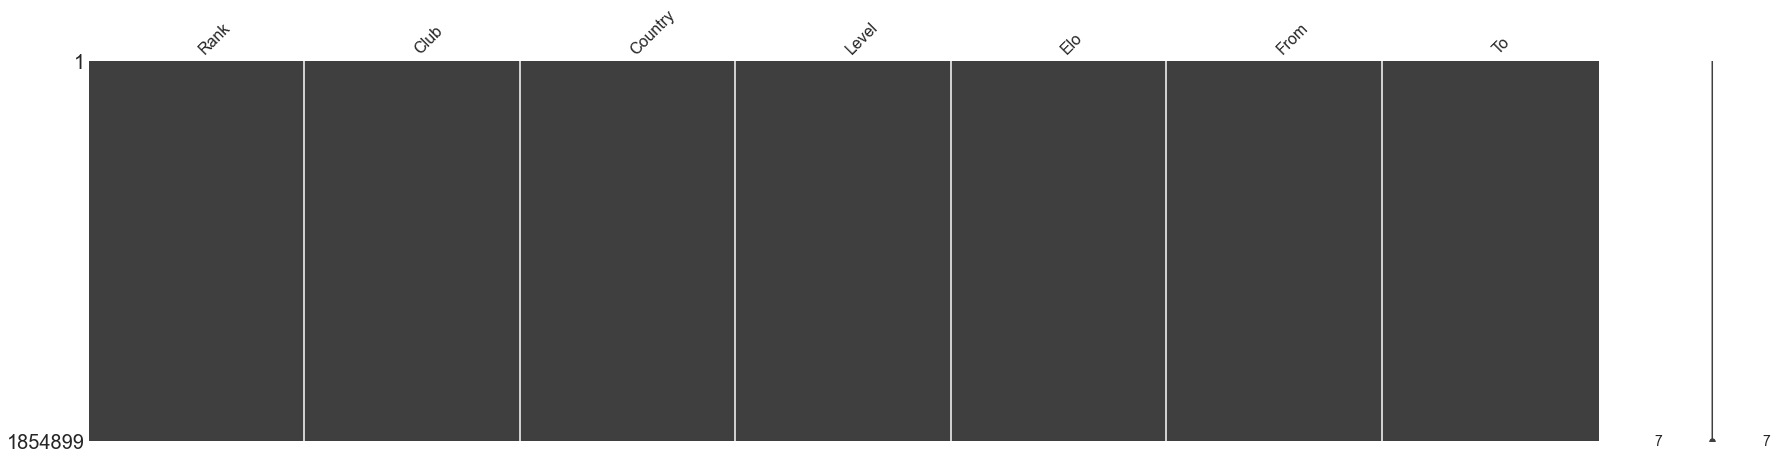

In [69]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_elo_team_ratings_all_raw
msno.matrix(df_elo_team_ratings_all_raw, figsize = (30, 7))

In [70]:
# Counts of missing values
null_value_stats = df_elo_team_ratings_all_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there are no missing values.

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

<a id='section4.1'></a>

### <a id='#section4.1'>4.1. Assign Raw DataFrames to New Engineered DataFrames</a>

In [71]:
# Assign Raw DataFrames to new Engineered DataFrames
df_elo_team_ratings_all = df_elo_team_ratings_all_raw.copy()

In [72]:
df_elo_team_ratings_all.head()

,Rank,Club,Country,Level,Elo,From,To
1203829,None,Besa Kavaje,ALB,0,1325.261230,1972-07-01,1972-09-13
1203830,None,Besa Kavaje,ALB,0,1337.468506,1972-09-14,1972-09-27
1203831,None,Besa Kavaje,ALB,0,1338.146362,1972-09-28,1972-10-25
1203832,None,Besa Kavaje,ALB,0,1335.007324,1972-10-26,1972-11-08
1203833,None,Besa Kavaje,ALB,0,1334.845581,1972-11-09,1978-07-01


<a id='section4.2'></a>

### <a id='#section4.2'>4.2. Converting Data Types</a>

In [73]:
df_elo_team_ratings_all['From'] = pd.to_datetime(df_elo_team_ratings_all['From'])
df_elo_team_ratings_all['To'] = pd.to_datetime(df_elo_team_ratings_all['To'])

In [74]:
df_elo_team_ratings_all.dtypes

Rank               object
Club               object
Country            object
Level               int64
Elo               float64
From       datetime64[ns]
To         datetime64[ns]
dtype: object

<a id='section4.3'></a>

### <a id='#section4.3'>4.3. Create New Attributes</a>

In [75]:
df_elo_team_ratings_all['Days'] = df_elo_team_ratings_all['To'] - df_elo_team_ratings_all['From']

In [86]:
df_elo_team_ratings_all

,Rank,Club,Country,Level,Elo,From,To,Days,Year_From
1203829,None,Besa Kavaje,ALB,0,1325.261230,1972-07-01,1972-09-13,74 days,1972
1203830,None,Besa Kavaje,ALB,0,1337.468506,1972-09-14,1972-09-27,13 days,1972
1203831,None,Besa Kavaje,ALB,0,1338.146362,1972-09-28,1972-10-25,27 days,1972
1203832,None,Besa Kavaje,ALB,0,1335.007324,1972-10-26,1972-11-08,13 days,1972
1203833,None,Besa Kavaje,ALB,0,1334.845581,1972-11-09,1978-07-01,2060 days,1972
...,...,...,...,...,...,...,...,...,...
1804701,None,Zlatibor,YUG,1,1306.602783,1992-04-30,1992-05-03,3 days,1992
1804702,None,Zlatibor,YUG,1,1312.926880,1992-05-04,1992-05-17,13 days,1992
1804703,None,Zlatibor,YUG,1,1312.077393,1992-05-18,1992-05-24,6 days,1992
1804704,None,Zlatibor,YUG,1,1331.334717,1992-05-25,1992-06-29,35 days,1992


##### Year

In [85]:
df_elo_team_ratings_all['Year_From'] = pd. DatetimeIndex(df_elo_team_ratings_all['From']).year

<a id='section4.4'></a>

### <a id='#section4.4'>4.4. Rename Attributes</a>

In [157]:
df_elo_team_ratings_all = df_elo_team_ratings_all.rename(columns={'Level': 'Domestic Division'})

<a id='section4.5'></a>

### <a id='#section4.5'>4.5. Aggregated data to one row per Team, per Season/Year</a>

Two methodologies:
1.    Take the last Elo value per year for each team (bad hack, but does give you each Team's Elo rating near the start of the season)
2.    Resample the data - using pandas [resample](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.resample.html) function

<a id='section4.5.1'></a>

#### <a id='#section4.5.1'>4.5.1. Take the last Elo value per team, per year</a>
Take the last value per year as that year's valuation. Ideally, this would be the date closest to September (start of the season), but for now, the current code is fine.

In [158]:
# Take the last Elo value per Team, per Year
df_elo_team_ratings_all_grouped = (df_elo_team_ratings_all
                                       .loc[df_elo_team_ratings_all.groupby(['Club', 'Country', 'Year_From']).From.idxmax(axis=0, skipna=True)]
                                       .reset_index(drop=True)
                                  )

# Drop unnecessary columns
df_elo_team_ratings_all_grouped = (df_elo_team_ratings_all_grouped
                                       .drop(['From', 'To', 'Days'], axis=1)
                                       .rename(columns={'Year_From': 'Year'})
                                       .drop_duplicates()
                                  )

# Diplay DataFrame
df_elo_team_ratings_all_grouped.head(10)

,Rank,Club,Country,Domestic Division,Elo,Year
0,None,AEK,GRE,1,1351.622559,1959
1,None,AEK,GRE,1,1385.260620,1960
2,None,AEK,GRE,1,1433.593506,1961
3,None,AEK,GRE,1,1361.075439,1962
4,None,AEK,GRE,1,1370.932983,1963
5,None,AEK,GRE,1,1363.367676,1964
6,None,AEK,GRE,1,1384.022217,1965
7,None,AEK,GRE,1,1325.130493,1966
8,None,AEK,GRE,1,1359.587036,1967
9,None,AEK,GRE,1,1396.072632,1968


In [159]:
df_elo_team_ratings_all_grouped.shape

(37334, 6)

<a id='section4.5.2'></a>

#### <a id='#section4.5.2'>4.5.2. Resample the data</a>
Take the average Elo value per year using pandas [resample](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.resample.html) function.

THIS IS CURRENTLY NOT WORKING, BUT IS THE BETTER SOLUTION.

In [160]:
#df_elo_team_ratings_all_grouped = df_elo_team_ratings_all['Elo'].resample('w').mean()

<a id='section4.6'></a>

### <a id='#section4.6'>4.6. Filter Teams in 'Big 5' European Leagues</a>
No MLS data in the dataset currently, so those teams cannot be included.

In [161]:
# Filter list of 'Big 5' European Leagues and MLS from DataFrame
df_elo_team_ratings_all_grouped_big5 = df_elo_team_ratings_all_grouped[df_elo_team_ratings_all_grouped['Country'].isin(lst_countries_big5)]

# Sort DataFrame by Country/Club
df_elo_team_ratings_all_grouped_big5 = df_elo_team_ratings_all_grouped_big5.sort_values(['Country', 'Club', 'Year'], ascending=[True, True, True])

# Drop duplicates
df_elo_team_ratings_all_grouped_big5 = df_elo_team_ratings_all_grouped_big5.drop_duplicates()

In [162]:
df_elo_team_ratings_all_grouped_big5.shape

(12323, 6)

<a id='section4.7'></a>

### <a id='#section4.7'>4.7. Filter for 2015/2016 Season Onwards</a>
Separate DataFrame created for transfers from 2015/2016 onwards as this is when the other data sources such as FBref start.

In [163]:
# Filter plays in the Big 5 European Leagues

## Define list of countries
lst_seasons_1516_2122 = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

## Filter list of Big 5 European League countries from DataFrame
df_elo_team_ratings_all_grouped_big5_1516_present = df_elo_team_ratings_all_grouped_big5[df_elo_team_ratings_all_grouped_big5['Year'].isin(lst_seasons_1516_2122)]

In [164]:
df_elo_team_ratings_all_grouped_big5_1516_present.shape

(1536, 6)

<a id='section4.8'></a>

### <a id='#section4.8'>4.8. Map Seasons</a>

In [165]:
# Map season to DataFrame
df_elo_team_ratings_all_grouped_big5_1516_present['Season'] = df_elo_team_ratings_all_grouped_big5_1516_present['Year'].map(dict_seasons)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
df_elo_team_ratings_all_grouped_big5_1516_present

,Rank,Club,Country,Domestic Division,Elo,Year,Season
1987,8,Arsenal,ENG,1,1844.670654,2015,2015/2016
1988,8,Arsenal,ENG,1,1868.986694,2016,2016/2017
1989,14,Arsenal,ENG,1,1843.742798,2017,2017/2018
1990,14,Arsenal,ENG,1,1834.147827,2018,2018/2019
1991,18,Arsenal,ENG,1,1791.202881,2019,2019/2020
...,...,...,...,...,...,...,...
35189,None,Vicenza,ITA,2,1341.564331,2017,2017/2018
35190,None,Vicenza,ITA,2,1384.246826,2020,2020/2021
35191,None,Vicenza,ITA,2,1389.424927,2021,2021/2022
35448,None,Virtus Lanciano,ITA,2,1377.387451,2015,2015/2016


---

<a id='section5'></a>

## <a id='#section5'>5. Exporting the Engineered DataFrames</a>
Export the two engineered [Club ELO](http://clubelo.com/) DataFrames as CSV files.

In [167]:
# Export DataFrame

## Save latest version
df_elo_team_ratings_all_grouped_big5_1516_present.to_csv(data_dir_elo + '/engineered/ratings_by_team/elo_team_rating_per_year_big5_latest.csv', index=None, header=True)

## Save a copy to archive folder (dated)
df_elo_team_ratings_all_grouped_big5_1516_present.to_csv(data_dir_elo + f'/engineered/ratings_by_team/archive/elo_team_rating_per_year_big5_last_updated_{today}.csv', index=None, header=True)

---

<a id='section7'></a>

## <a id='#section6'>6. Summary</a>
This Jupyter notebook engineered scraped football data from [Club ELO](http://clubelo.com/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

---

<a id='section7'></a>

## <a id='#section7'>7. Next Steps</a>
The step is to use this data to...

---

<a id='section8'></a>

## <a id='#section8'>8. References</a>

*    
*    
*    

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)